In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;} 
div.cell.code_cell.rendered{width:100%;} 
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;} 
div.text_cell_render.rendered_html{font-size:14pt;} 
div.output {font-size:14pt; font-weight:bold;} 
div.input {font-family:Consolas; font-size:14pt;} 
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;} 
div.text_cell_render ul li{font-size:12pt;padding:5px;} 
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch11_데이터프레임과 시리즈(Pandas)</font></b>
- pip install pandas
# 1절 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로하며,
  다른 많은 라이브러리와 잘 통합되도록 설계
  
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공

- 판다스 장점 
    * 데이터프레임생성, 파일io, 레이블링, 부분데이터 추출, 
    * 크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터구조변경, 결측치 처리
    
- https://pypi.python.org/pypi/pandas (package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html (API reference)


In [47]:
import pandas as pd
pd.__version__

'1.5.3'

In [75]:
pd.read_json?

In [49]:
data = pd.read_json('data/ch09_member1.json',
                   encoding='cp949')   # 기본 encoding은 utf-8
display(data)      # 데이터프레임은 print()가 아니고 display()해줘야 보기 좋다.
print(type(data))

,Name,Age,Email,Address
0,홍길동,30,hg@hong.com,서울시
1,박길동,20,pg@hong.com,부산시
2,신길동,25,sg@hong.com,대전시


<class 'pandas.core.frame.DataFrame'>


In [50]:
member4 = pd.read_csv('data/ch09_member4.csv')  # 기본 encoding은 utf-8
member4

,Name,Age,Email,Address
0,신길동,30,sindong@hong.com,서울시 동작구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,마길동,20,ma@hong.com,서울시 마포구


In [51]:
# 헤더가 없는 경우
member1 = pd.read_csv('data/ch09_member1.csv',
                     header=None,
                     names=['name','age','email','address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2절 데이터프레임 만들기
## 2.1 딕셔너리 리스트를 이용해서 데이터 프레임 만들기

In [52]:
d = [{'kor':100, 'mat':95},{'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [53]:
df.to_dict() # 데이터프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [54]:
df.to_numpy() # 데이터프레임을 넘파이배열로
df.values

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [55]:
df.dtypes  #열의 타입

kor    int64
mat    int64
dtype: object

In [56]:
df.info()  # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [57]:
df['kor'].dtype

dtype('int64')

In [58]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
df['kor'] = df['kor'].astype('float64')  # kor 열의 타입을 float64로

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [60]:
d = [{'kor':100.0, 'mat':95},{'kor':90, 'mat':99},{'kor':92, 'eng':99}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100.0,95.0,NaN
1,90.0,99.0,NaN
2,92.0,NaN,99.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      float64
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [62]:
type(np.nan)  # np.nan 결측치


float

In [63]:
df['kor'] = df['kor'].astype('int32')

In [64]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)
# df['mat'] = df['mat'].astype('int32')

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [65]:
kor =[100,90,95,90,65]
mat =[99,100,95,98,94]
df = pd.DataFrame({'kor':kor, 'mat':mat})
df.head(2)   # 상위 2행만

,kor,mat
0,100,99
1,90,100


In [66]:
df = pd.DataFrame(data=np.c_[kor,mat], columns=['국#어', '수#학'])
df

,국#어,수#학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [67]:
df.shape

(5, 2)

In [68]:
l = [['트렌드 코리아2026', '김난도', 18000, 10],
     ['사탄탱고','라슬로',1782.,10],
     ['미술관 여행자', '카미유주노', 29700, 10]]
df = pd.DataFrame(l,columns=['책이름','저자','가격','할인'])
df

,책이름,저자,가격,할인
0,트렌드 코리아2026,김난도,18000.0,10
1,사탄탱고,라슬로,1782.0,10
2,미술관 여행자,카미유주노,29700.0,10


In [69]:
# %ls : ipython 매직명령어
# !dir : 쉘명령어

In [72]:
%ls  "c:/ai/downloads/shareData/상가정보/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 c:\ai\downloads\shareData\상가정보 디렉터리

2025-10-12  오후 03:33    <DIR>          .
2025-10-12  오후 03:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장진흥공단

In [73]:
df = pd.read_csv(r'c:/ai/downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                encoding='utf-8', sep=',',  # 기본값 생략가능
                nrows=70)  # 처음 70행만 가져오기

In [76]:
df.shape

(70, 39)

In [74]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [79]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39   # 39열까지 display가능, 기본값은 20
pd.options.display.max_rows = 70      # 70행까지 display가능, 기본값은 60

In [80]:
df.head(1)   # 가독성이 떨어진다.

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [81]:
df.head(1).T   # 행과 열을 바꿔서 출력

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


## 2.3 read_csv

In [84]:
# help(pd.read_csv)  # git에 올리면 화면에 모든 내용이 출력되어 보기 싫다
# pd.read_csv()   # 함수 안에서 shift+tab+tab
pd.read_csv?

In [86]:
# (1) CSV 파일 볼러오기(기본값)
member = pd.read_csv('data/ch11_member.csv',
                    #, encoding='utf-8', sep=',', comment 주석처리X
                    )
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [91]:
# 문자(object)형으로 읽어들인 Birth를 datatime형으로
# 형변환 : astype('int64'), astype('datatime64': 비추)
#         to_datetime()함수
# member['Birth'].astype('datetime64')  #(비추)
member['Birth'] = pd.to_datetime(member['Birth'])      # member['Birth'].astype('datetime64')와 같은 문장, 좀더 많이 쓴다.
# parse_dates 보다  pd.to_datetime(member['Birth'])를 더 많이 쓴다(시계열 데이터 연산시 꼭 필요)
# parse_dates는 결측치 처리가 않되서
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [92]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [93]:
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [95]:
# (2) 특정행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membercp949.csv',
                    encoding='cp949',
                    skiprows=[1,6])   # 1,6번 행 제외하고
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [97]:
# (3) 상위 몇 행만 sep문자는 , 아닌 csv파일 읽어오기
member = pd.read_csv('data/ch11_membersep.csv',
                    nrows=5,   # 상위 5행만
                    sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [104]:
# (4) 주석(#)제외, datetime형 필드를 지정하여 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv',
                    sep='\t',          # 구분자 설정
                    comment='#',       # 주석제외
                    parse_dates=['Birth'])  # datetime64형으로 읽어올 필드 지정
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## 2.4 패키지에서 가져오기: iris 데이터
- iris 가져오는 방법1 : sklearn(머신러닝 패키지)
- iris 가져오는 방법2 : statsmodels (R 데이터)
- iris 가져오는 방법3 : seaborn(시각화 패키지) 
### 2.4.1 iris 가져오는 방법1 : sklearn
- sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [113]:
from sklearn import datasets  # 머신러닝을 공부하기 위한 학습 데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리형식으로 제공
iris = datasets.load_iris()
print(type(iris))  # _bunch.Bunch타입(딕셔너리를 상속받은 타입) 딕셔너리처럼 동작
iris
# print(iris.DESCR) # iris 데이터 셋의 설명
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [114]:
iris.data  # 독립변수
iris['data'][:3]   # 상위 3행

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [115]:
# 데이터프레임의 열이름(비추)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [119]:
# 데이터프레임의 열이름(강추)
[col[:-5].replace(' ','_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [123]:
iris.target   # ML/DL 학습시 타겟변수(종속변수)
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [125]:
iris.target_names[iris.target]   # 데이터프레임에 쓸타겟변수(가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [127]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target].reshape(-1,1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [128]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [134]:
# 1. 독립변수와 종속변수를 stack한후 데이터 프레임으로
df = pd.DataFrame(np.hstack((data, target)),
                 columns=iris.feature_names + ['species'])
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [140]:
# df.sepal
# df['sepal length (cm)']
[col[:-5].replace(' ','_') for col in iris.feature_names] + ['species']
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [141]:
# 2. 독립변수, 종속변수를 따로 데이터프레임으로생성 -> 두 데이터프레임을 연결
X = pd.DataFrame(iris.data,
                columns=[col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [142]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y.head(1)

,species
0,setosa


In [148]:
print('X의 shape : ', X.shape)
print('y의 shape : ', y.shape)
print('X의 index : ', X.index)
print('y의 index : ', y.index)

X의 shape :  (150, 4)
y의 shape :  (150, 1)
X의 index :  RangeIndex(start=0, stop=150, step=1)
y의 index :  RangeIndex(start=0, stop=150, step=1)


In [149]:
iris_df = pd.concat([X,y], axis=1)  # 두 개의 데이터프레임을 열로 연결
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2.4.2 iris 가져오는 방법2 : statsmodels

In [3]:
# R 데이터 가져오기의 기본 데이터 가져오기
from statsmodels.api import datasets      # statsmodels는 내컴에 있고
iris_dataset = datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True)     # 한번 다운로드한 데이터를 pc에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [5]:
iris = iris_dataset.data
iris.head()   #상위5행 -default

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.Species  # iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [8]:
iris['Sepal.Length']
# iris.Sepal.Length    # 열이름에 .이 있으면 iris.Sepal.Length 접근불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [12]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]   # .을 _로 바꾸고 모두 소문자로
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3 iris 가져오는 방법3 : seaborn

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [18]:
# 전처리된 데이터프레임을 파일로 출력(4k)
iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값,  엑셀에서 직접 열고 싶으면 cp949
           index=False)   # 행이름이 생략되서 파일 출력

In [19]:
iris.to_csv('data/ch11_iris.csv.gz',  # 889byte =>1/4로 압축됨
            index=False,
            compression='infer')  # infer 파일 확장자에 맞게 압축해라

In [21]:
import pandas as pd
# read_iris = pd.read_csv('data/ch11_iris.csv') # 압축안한 파일 읽을 때
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer')  # 압축한 파일 읽을 때는 반드시 compression='infer지정해야한다.
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [64]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [65]:
member.columns = ['이름','나이','메일','주소','생일']
member.head(1)

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 3.2 행이름 지정하기

In [66]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [67]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [68]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [69]:
# member['이름']['동']  # 판다스식
member.loc['동','이름']   # 행과 열이름으로 부분 데이터 조회: loc

'홍길동'

In [70]:
# index를 이름열로 (실행결과가 출력되서 나오면 return될뿐, member는 안 바뀜)
# member를 수정하려면 (1)할당   (2)inplace매개변수에 True(기본값은 False)
member1 = member.set_index('이름')
member1.head(1)

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [71]:
member.set_index('이름', inplace=True)

member

In [72]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [73]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [74]:
# 인덱스를 컬럼으로 편입시키기
member.reset_index(inplace=True)

In [75]:
member.index = [0, 1, 2, 0, 1]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [76]:
# 기존의 index를 새로운 열데 편입시키지 않고 제거한 후 , 새로운 숫자 index로 초기화
# member.index = range(len(member))
member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [77]:
# datetime 열에서 날짜 및 시간에 관련된 정보를 추출: 시리즈.dt
member['생일'].dt.year

0    1999
1    1999
2    1999
0    1999
1    1999
Name: 생일, dtype: int64

In [78]:
member['생일'].dt.month

0     1
1    12
2    11
0     5
1     1
Name: 생일, dtype: int64

In [79]:
member['생일'].dt.weekday   # 0:월, 1:화, ..., 5:토, 6:일

0    4
1    2
2    0
0    5
1    5
Name: 생일, dtype: int64

## 3.3 레벨이름 지정하기

In [80]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [81]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [82]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [83]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름', '나이','메일','주소','생일']]
member.columns.names =['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
0    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
1    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [84]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [85]:
member.loc[('상하','북'),('기본정보','이름')]

'홍길북'

In [86]:
member.loc['상하','기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [63]:
member.loc[('상하','중'),'기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

# 4절 부분 데이터 조회

In [101]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열 조회

In [89]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [90]:
# member[0]  # 행이름으로 []로 조회할 경우 에러 ==> loc를 써야 한다.

KeyError: 0

In [91]:
member[['Name','Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름 자리에 슬라이싱 (from:to) : from 부터 to까지(to 포함)
    * 행이름과 열이름 자리에 리스트 

In [102]:
member.loc[0:2]    # 모든 열을 다 출력할 경우 열 생략가능
member.loc[0:2,]  
member.loc[0:2, :] 
member.loc[0:2, ...] 

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [105]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [106]:
member.loc['동':'남', 'Name':'Address']   # 동~남행, Name~Address 열까지

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [107]:
# 동, 남행, Name, Email, Address열
member.loc[['동','남'], ['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [108]:
member.loc[:,'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3 iloc을 이용한 조회
- df.iloc[행순번, 열순번] : 행번호, 열번호로 조회
    * 행순번과 열순번 자리에 슬라이싱 (from:to:by) - from 부터 to 앞까지 by씩(to 미포함)
    * 행순번과 열순번 자리에 리스트 

In [109]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [111]:
# 동(0)행부터 남(2)행까지 모든 열
member.iloc[0:3]
member.iloc[0:3, ]
member.iloc[0:3, :]
member.iloc[0:3, ...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [113]:
# 0번째 행
type(member.iloc[0])

pandas.core.series.Series

In [114]:
# 동(0)행부터 남(2)행까지 Name(0)열부터 Address(3)열까지
member.iloc[0:3, 0:4]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [115]:
# 짝수번째 행의 마지막 열을 제외하고 출력
member.iloc[::2, 0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [116]:
# 마지막행부터 처음행까지 꺼꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [117]:
# 동(0)행과 남(2)행, Name(0)열 ,Email(2)열, Address(3)열
member.iloc[[0,2], [0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [119]:
# Name(0)열
member.iloc[:, 0]
member.iloc[..., 0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.4 조건으로 조회하기

In [120]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [121]:
member['Name']=='홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [125]:
# Name이 홍길남인 행을 모두
member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']
member.loc[[False,False,True,False,False]]  # 이렇게 쓰지 않지만 설명을 위해서....

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [126]:
# Name이 홍길남의 이름과 나이, Email
member.loc[member['Name']=='홍길남', 'Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [127]:
# Name이 홍길남의 이름과 Email
member.loc[member['Name']=='홍길남', ['Name','Email']]

,Name,Email
남,홍길남,nam@hong.com


In [159]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [162]:
# 23세 이상 데이터 조회(모든 열)
member[member['Age'] >= 23]
member.loc[member['Age'] >= 23]
member.loc[member['Age'] >= 23,]
member.loc[member['Age'] >= 23,:]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [130]:
# 23세 이상의 Name, Age, Email
member.loc[member['Age'] >= 23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [132]:
# 23세 이상의 Name, Age, Address
member.loc[member['Age'] >= 23, ['Name','Age','Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [136]:
# ~ : 반대(invertor)
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [139]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부:', address.startswith('서울시'))
print('중구가 포함되는지 여부:', address.find('중구')!=-1)

서울시로 시작하는지 여부: True
중구가 포함되는지 여부: False


In [140]:
# member['Address'].startswith('서울시')   # member['Address']가 시리즈라서 startswith() 쓸수 없다.

AttributeError: 'Series' object has no attribute 'startswith'

※ 시리즈에 문자함수를 쓰기 위해 참조(pdf29page) : 
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling 

In [144]:
# 서울시로 시작하는 데이터
member['Address'].str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [145]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [147]:
# Address에 중구를 포함하는 데이터(방법1)
member[member['Address'].str.find('중구')!= -1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [149]:
# Address에 중구를 포함하는 데이터(방법2)
member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [152]:
# 시리즈.isin([])
# 이름이 홍길동이거나 홍길남인 데이터
member[member['Name'].isin(['홍길동','홍길남'])]
member.loc[member['Name'].isin(['홍길동','홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [153]:
# 이름이 홍길동이거나 홍길남인 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동','홍길남']),['Name','Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [155]:
# 2000년 이전에 태어난 사람의 데이터
member[member['Birth'].dt.year < 2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [167]:
# 조건 연산자를 이용해서 추출(조건2개)
import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[np.nan,80,np.nan,85],
                     'kor':[100,80,60,np.nan]})  # 결측치 때문에 Float으로 형변환됨
# 영어 80이상이고 국어 80이상인 데이터 추출
data[(data['eng']>=80) & (data['kor']>=80)]  # 논리연산시 결측치 제외됨

,eng,kor
1,80.0,80.0


In [168]:
# 결측치 확인 방법1(각 열별)  이상치를 중위수(5등의 점수)로 대체
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [169]:
# 결측치 확인 방법2
data.isna()  # 결측치 여부 (모든 행, 모든 열 하나하나)

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [170]:
True + True + False

2

In [171]:
data.isna().sum()   # 각 열의 결측치 갯수

eng    2
kor    1
dtype: int64

※ 데이터 프레임의 부분 데이터 조회방법
- df[열이름] : 특정열 조회
- df[조건] : 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름]
    - 행이름, 열이름 자리에 슬라이싱, 리스트
    - 열이름 생략시 모든 열
    - 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    - 행순번, 열순번 자리에 슬라이싱, 리스트
    - 열순번 생략시 모든 열

- 데이터프레임 조건 추출 quiz

In [207]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [192]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [195]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
# iris.loc[0:10,'sepal_length':'petal_width']
iris.loc[0:10, iris.columns]
iris.iloc[0:11,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [248]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
# iris.loc[3:10,['sepal_length','petal_length']]
iris.iloc[3:11,[0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [250]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100],]
iris.loc[[0,50,100]]
# iris.iloc[[0,50,100],]
iris.iloc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [215]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[iris.index[iris.index%25 == 0],['petal_length', 'petal_width']]
# iris.iloc[iris.index[iris.index%25 == 0],[3,4]]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [222]:
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris['species'] == 'versicolor',]
iris.iloc[iris.index[iris['species'] == 'versicolor'],]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [232]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
# iris.loc[iris['species'] == 'setosa',].head(5)
iris.iloc[iris.index[iris['species'] == 'setosa']].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [236]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
# iris.loc[iris['sepal_length'] >= 6.5,].head(5)
iris.iloc[iris.index[iris['sepal_length'] >= 6.5],].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [242]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
# iris.loc[iris['sepal_length'] >= 7.2,['sepal_length','sepal_width','petal_length']]
iris.iloc[iris.index[iris['sepal_length'] >= 7.2],1:4]

,sepal_width,petal_length,petal_width
105,3.0,6.6,2.1
107,2.9,6.3,1.8
109,3.6,6.1,2.5
117,3.8,6.7,2.2
118,2.6,6.9,2.3
122,2.8,6.7,2.0
125,3.2,6.0,1.8
129,3.0,5.8,1.6
130,2.8,6.1,1.9
131,3.8,6.4,2.0


In [245]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열

iris.loc[(iris['sepal_length'] >= 6.5) & (iris['species'] == 'versicolor')]
# iris.iloc[iris.index[(iris['sepal_length'] >= 6.5) & (iris['species'] == 'versicolor')]]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [251]:
import numpy as np

In [252]:
iris[np.logical_and(iris['species'] == 'versicolor',
               iris['sepal_length'] >= 6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [ ]:
# iris 가져오기(sklearn, statsmodels, seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
display(iris.head(1))
# 1. sepal_length 열만 출력
iris['sepal_length']
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10, 'sepal_length':'petal_width']
df.loc[0:10, df.columns[:-1]] # 메일 받은 내용
iris.iloc[0:11, :-1]
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[0:100:50]
iris.loc[[0, 50,100]]
iris.iloc[0:101:50]
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[0:125:25, 'petal_length':'petal_width']
iris.iloc[0:126:25, 2:-1]
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris[iris['species']=='setosa'].iloc[:5]
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris[iris['sepal_length']>=6.5].iloc[:5]
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length']>=7.2][['sepal_length','sepal_width','petal_length']]
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]
import numpy as np
iris[np.logical_and(iris['species']=='versicolor', iris['sepal_length']>6.5)]

# 5절 데이터 삭제 및 추가
## 5.1 데이터프레임의 요소 삭제
- df.drop(삭제할 열이름 or 행이름, axis) :
    * axis=0(기본값)일 때는 행 삭제, axis=1 일 때는 열 삭제

In [253]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [257]:
# 1) 단일 행 삭제  
member.drop('중') #  axis=0 (기본 값) : 해당 행 삭제
# 삭제한 결과를 member에 적용하려면 (1)할당 member=member.drop('중', axis=0)
#                               (2)member.drop('중', axis=0, inplace=True)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [259]:
# 2) 복수 행 삭제  
member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [260]:
# 3) 열 삭제
member.drop(['Name','Email'], axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5.2 데이터프레임의 요소 추가

In [261]:
# 1) 열 추가
member['nickname'] = '빼꼼이'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼꼼이
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼꼼이
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼꼼이
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼꼼이
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼꼼이


In [262]:
# 2) 리스트를 이용한 열 추가
member['favorite_no'] = [3,2,7,None,12]
member

,Name,Age,Email,Address,Birth,nickname,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼꼼이,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼꼼이,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼꼼이,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼꼼이,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼꼼이,12.0


In [265]:
# 3) favorite_num 열에 결측치를 할당 후 , 원하는 데이터에 다시 할당
member['favorite_num'] = np.nan
member.iloc[::2,-1] = 7
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼꼼이,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼꼼이,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼꼼이,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼꼼이,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼꼼이,12.0,7.0


In [266]:
member.drop(['Email', 'Birth','favorite_no','favorite_num'], axis=1, inplace=True)
member

,Name,Age,Address,nickname
동,홍길동,20,서울시 강동구,빼꼼이
서,홍길서,30,서울시 중구,빼꼼이
남,홍길남,21,서울시 강동구,빼꼼이
북,홍길북,22,서울시 관악구,빼꼼이
중,홍길중,23,부산시 중구,빼꼼이


In [270]:
# 4) 딕셔너리로 행 추가
new_member = pd.DataFrame([
        {'Name':'홍길쑥', 'Age':30, 'Address':'서울','nickname':'빠꼼이'}
    ])
member = pd.concat([member, new_member]).reset_index(drop = True)
member

,Name,Age,Address,nickname
0,홍길동,20,서울시 강동구,빼꼼이
1,홍길서,30,서울시 중구,빼꼼이
2,홍길남,21,서울시 강동구,빼꼼이
3,홍길북,22,서울시 관악구,빼꼼이
4,홍길중,23,부산시 중구,빼꼼이
5,홍길쑥,30,서울,빠꼼이


# 6절 병합과 연결
## 6.1 merge()를 이용한 데이터프레임 병합

In [273]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df1.merge(df2)  # how='inner' 기본값:내부조인(양쪽이 다 일치하는 데이터만 병합) - 공통된 key값만 병합되는 것이 default

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [274]:
df1.merge(df2, how='left')  # 왼쪽의  df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [275]:
df1.merge(df2, how='right')  # 오른쪽의  df2 데이터는 모두 남기고 왼쪽 df1이 매칭되도록

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [277]:
df1.merge(df2, how='outer')  # 양쪽 df1, df2 데이터 모두 남김

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


In [281]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df3.merge(df4, left_on='key3', right_on='key4', how='inner')   # 열이름을 변경하여 맞춰주고 병합할 것

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


## 6.2 concat()을 이용한 데이터 프레임 연결
- pd.concat([df1, df2, df3..], axis)
    * axis=0 (기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [283]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
pd.concat([df3,df4], axis=1)     # 좌우 연결

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [286]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})   
pd.concat([df3,df4]).reset_index(drop=True) # 위 아래 연결 시 인덱스 조절(기존 인덱스 버리고 다시 만든다.)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7절 정렬(행 이름, 열 이름, 값에 의한 정렬)
- df.sort_index(axis) : 행 또 열이름으로 정렬
- df.sort_values(by=[정렬기준이될 열이름], ascending=T/F, inplace=T/F) : 특정 열 값에 의한 정렬

In [288]:
member = pd.read_csv('data/ch11_member.csv',comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행 이름으로 정렬

In [289]:
#ascending=True 오름차순(기본값)/ ascending=False (내림차순)
member.sort_index(axis=0, inplace=True)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열 이름으로 정렬

In [290]:
member = member.sort_index(axis=1) # axis='columns'
member

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [291]:
member.sort_values(by='Age')   # Age 기준으로 오름차순 정렬(ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [292]:
member.sort_values(by='Age',ascending=False)

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [293]:
member.loc[:,'Age'] = [20,20,30,30,30]
member

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,20,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,30,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중


In [294]:
# Age 기준으로 내림차순, Age가 같으면 Email기준 오름차순 정렬
member.sort_values(by=['Age','Email'], ascending=[False,True])

,Address,Age,Birth,Email,Name
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,30,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,20,1999-12-01,seo@hong.com,홍길서


 # 8절 기초 통계 분석
     - 판다스는 기초통계(데이터 요약), statsmodels:난이도 있는 통계
 - count : NaN을 제외한 데이터 수
 - min   : 최소값
 - max   : 최대값
 - sum   : 합계
 - cumsum : 누적합
 - cumprod :누적곱
 - mean   : 평균
 - median : 중위값(중위수 -옛날표현)
 - std : 표준편차
 - var : 분산
 - quantile : 분위수(0사분위수==최소값, 1사분위수,2사분위수(중위값),3사분위수, 4사분위수=최대값)
     * 이상치 구하는 용도 : Q1-1.5*IQR ~ Q3+1.5*IQR 이외의 데이터는 이상치
 - describe : 요약통계량
 - corr : 상관관계(계수)
 - rolling(n).mean() :n개씩 평균 출력 - 데이터값의 변동이 많을 때 추세(패턴)를 부드럽게 보고 싶을 때 

In [8]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.sample(2)
iris.tail(1)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica


In [3]:
iris.Species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

## 8.1 min, max, ...

In [14]:
iris.min()   # 열별 최소값(axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [16]:
iris.median(axis=0, numeric_only=True)  # iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [22]:
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, :-1]
X.mean(axis='rows')  # 열별 평균 == 행들의 평균(axis=0이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [24]:
X.mean(axis=1) 
X.mean(axis='columns')  # 행별 평균 == 행을 고정하고, 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [28]:
import pandas as pd
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
# interpolation='nearest'  : 정확한 구간의 값이 없을 경우 가까운 값
df['value'].quantile(q=[0, 0.25, 0.55, 0.75, 1], interpolation='nearest')

0.00     1
0.25     3
0.55     4
0.75     7
1.00    10
Name: value, dtype: int64

In [29]:
# interpolation='midpoint'  : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0, 0.35, 0.55, 0.9, 1], interpolation='midpoint')

0.00     1.0
0.35     3.5
0.55     5.5
0.90     8.5
1.00    10.0
Name: value, dtype: float64

In [31]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [39]:
qunt = X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0,idx]
    Q1 = qunt.iloc[1,idx]
    Q3 = qunt.iloc[3,idx]
    max = qunt.iloc[4,idx]
    iqr = Q3 - Q1
    # print(idx, col, min, q1, q3, iqr, sep=' _ ')
    lower_outlier = Q1 -1.5*iqr   # 하한이상치 limit
    upper_outlier = Q3 +1.5*iqr   # 상한이상치 limit
    print(f"{idx}번째 : {col} : ", end='')
    print("하한이상치 여부 : {}, 상한 이상치 여부 : {}".format(min<lower_outlier,
                                                           max>upper_outlier))

0번째 : sepal_length : 하한이상치 여부 : False, 상한 이상치 여부 : False
1번째 : sepal_width : 하한이상치 여부 : True, 상한 이상치 여부 : True
2번째 : petal_length : 하한이상치 여부 : False, 상한 이상치 여부 : False
3번째 : petal_width : 하한이상치 여부 : False, 상한 이상치 여부 : False


<Axes: >

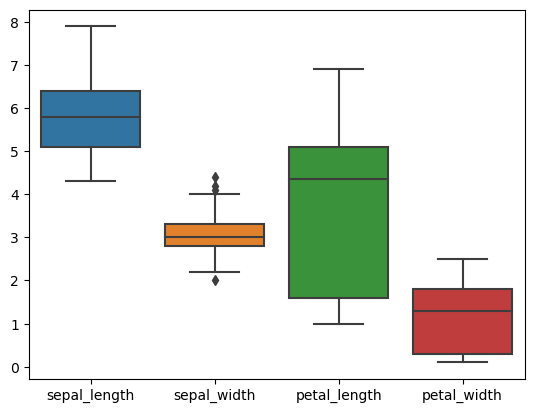

In [41]:
# 상자수염그림(박스플롯) - 시각화 교안 21page
import seaborn as sns
sns.boxplot(data=iris)

In [43]:
iris['sepal_length'].rolling(5).mean()[4:30]   # 인접한 5개 데이터의 평균  - 국소적인것 무시하고 전반적인 추세를 나타내기 위해

4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
25    4.92
26    4.90
27    5.02
28    5.04
29    5.02
Name: sepal_length, dtype: float64

## 8.2 요약 통계량
- describe()

In [44]:
# 1) 기본 요약 통계량
iris.describe()    # 기본값 : 숫자열에서의 요약 통계량(문자는 빼고)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
iris['species'].describe()
iris.species.describe()    # 문자열에서의 요약통계량 : 데이터갯수, 종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [46]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                   'b':[2.1,4]*3,
                   'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                   'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [47]:
df.describe()   # 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [49]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정 - df.info()의 Dtype로 지정해야 함 , Object는 문자, bool, object의 통계는 갯수, 종류, 빈도수
df.describe(include=['float64','bool','object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [50]:
df.describe(include='all')   # 모든 타입의 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [51]:
# exclude 매개변수를 이용해서 기본통계량 출력에서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [52]:
df['c'].unique()   # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [53]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [55]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n-1로 나눈값
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [56]:
# -1 < 상관계수(공분산/(x1의 표준편차*x2의 표준편차)) < 1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap) - 시각화 교안21page


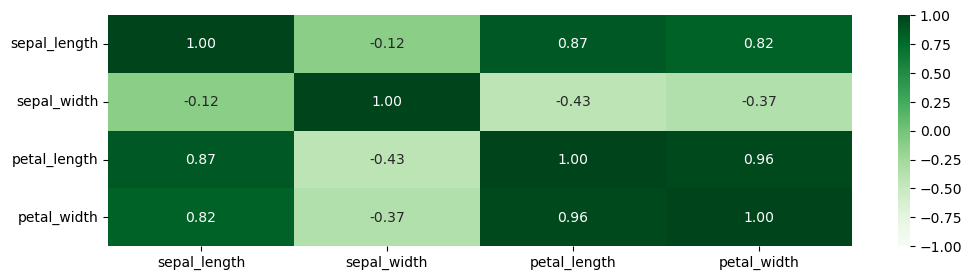

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f',cmap='Greens')
plt.show()